#### Nom : KAMBECO
#### POST-NOM :MPIANA
#### PRENOM : HANS
**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1><center>Travail Pratique d'infocentre</center></h1>

### Importation des bibliotheques

In [1211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### (1) Importation du dataset

In [1212]:
travail = pd.read_excel('C:/Users/hans/Documents/mes documents/dataset_Hans_Kambeco_Mpiana/data_vin.xlsx')

#### Affichage du dataset

In [1214]:
travail.head()

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


Notre jeu de données comprends 6497 lignes(consommateurs du vin) et 12 colonnes(variables)
Notre dataset n'a pas de valeurs manquantes et contient que les valeurs numériques, ce qui nous facilites la tâche

### (2) Affichage des caractéristiques statistiques

In [1215]:
travail.describe()

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2042.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,812.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,3273.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,4897.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


ici on voit la moyenne de chaque variable, l'ecart-type, min etc....

### (3) Segmentation du dataset en 10 classes

In [1216]:
from sklearn.cluster import KMeans

In [1217]:
model = KMeans(n_clusters = 10)
model.fit(travail)
qualite = model.labels_
qualite

array([0, 0, 0, ..., 9, 9, 9])

Je segmente cet ensemble de données en dix classes, chaque classe va réprenter la qualité d'un vin

### (4) la taille de chaque classe

In [1218]:
taille = np.unique(qualite,return_counts=True)
taille

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([854, 533, 525, 529, 826, 532, 528, 531, 839, 800], dtype=int64))

la classe 0 = 854 consommateurs, classe 1 = 533 etc.... jsuqu'à la classe 9

### (5) graphique

In [1219]:
from sklearn.decomposition import PCA

In [1220]:
modele = PCA(n_components=2)
reduction = modele.fit_transform(travail)

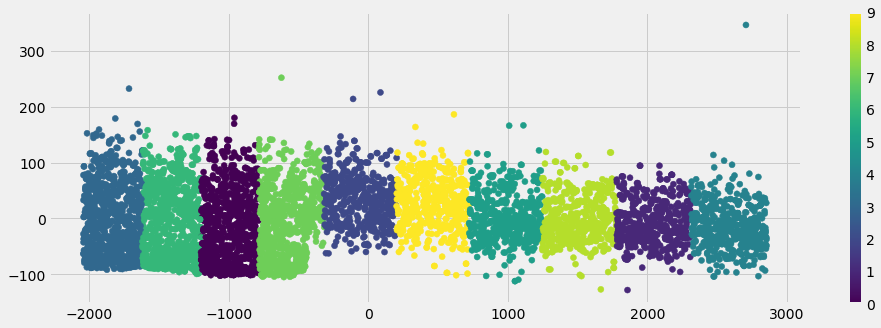

In [1221]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 5))
plt.scatter(reduction[:,0],reduction[:,1], c=clusters);
plt.colorbar();

Ici j'ai utilisé l'analyse en composante principale pour reduire la dimension de notre dataset pour l'afficher en 2D

### (6) Les caracteristiques statiques de chacune des classes

In [1222]:
travail.groupby([qualite]).describe()

ID_individu                                                             \
        count         mean         std     min      25%     50%      75%   
0       854.0   213.001171  123.338206     0.0   106.25   213.0   319.75   
1       533.0  3571.000000  154.008117  3305.0  3438.00  3571.0  3704.00   
2       525.0  1982.000000  151.698715  1720.0  1851.00  1982.0  2113.00   
3       529.0  4633.000000  152.853416  4369.0  4501.00  4633.0  4765.00   
4       826.0  1052.507264  119.308353   846.0   949.25  1052.5  1155.75   
5       532.0  3038.500000  153.719441  2773.0  2905.75  3038.5  3171.25   
6       528.0  2508.500000  152.564740  2245.0  2376.75  2508.5  2640.25   
7       531.0  4103.000000  153.430766  3838.0  3970.50  4103.0  4235.50   
8       839.0   636.249106  121.173690   426.0   531.50   636.0   741.00   
9       800.0  1463.567500  123.144605  1257.0  1359.00  1459.0  1559.00   

          fixed_acidity            ... sulphates       alcohol             \
      max         count      mean  ...       75%   max   count       mean   
0   427.0         854.0  7.648361  ...      0.66  2.00   854.0  10.068735   
1  3837.0         533.0  6.701689  ...      0.54  0.88   533.0  10.978612   
2  2244.0         525.0  7.307048  ...      0.55  0.92   525.0  10.107619   
3  4897.0         529.0  6.272590  ...      0.55  1.08   529.0  10.886957   
4  1261.0         826.0  7.615133  ...      0.65  1.34   826.0  10.616223   
5  3304.0         532.0  6.680263  ...      0.53  0.99   532.0  11.006579   
6  2772.0         528.0  7.006345  ...      0.58  1.06   528.0  10.207765   
7  4368.0         531.0  6.591714  ...      0.55  0.98   531.0  10.643653   
8   846.0         839.0  8.010489  ...      0.65  1.62   839.0  10.209297   
9  1719.0         800.0  7.319250  ...      0.62  1.33   800.0  10.522062   

                                           
        std  min   25%   50%   75%    max  
0  1.007938  8.5   9.4   9.8  10.5  14.00  
1  1.330905  8.4   9.8  11.0  12.2  13.90  
2  1.054117  8.6   9.3   9.9  10.8  13.00  
3  1.258536  8.7   9.8  10.9  11.8  14.05  
4  1.124430  8.5   9.6  10.5  11.4  14.00  
5  1.228098  8.0  10.0  11.0  12.0  14.00  
6  1.089764  8.0   9.4  10.0  10.8  13.50  
7  1.308941  8.4   9.5  10.5  11.6  14.20  
8  1.078642  8.4   9.4   9.9  10.9  14.90  
9  1.087568  8.5   9.7  10.4  11.3  14.00  

[10 rows x 96 columns]

les statiques de chaque classe, on a 10 lignes et 96 colonnes pour toutes les variables

### (7) Separation des données

In [1223]:
features = ['ID_individu', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [1224]:
X = travail[features]
y = qualite

In [1233]:
from sklearn.model_selection import train_test_split# module qui permet de separer les données

In [1234]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)# je garde 20% de données pour le test

j'ai créé une liste nommée features pour stocker toutes les variables de notre dataset pour bien separer les données d'entrainements aux données de test
y = qualite qui est notre liste de differentes classes(target)

**importation de differents algorithmes en utilisant le package scikit-learn**

In [1235]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Evaluation sur les données d'entrainement

In [1236]:
model_1 = LogisticRegression(max_iter=100)
model_2 = MLPClassifier()
model_3 = DecisionTreeClassifier(criterion = 'gini')
model_4 = DecisionTreeClassifier(criterion = 'entropy')
model_5 = KNeighborsClassifier(n_neighbors=2)

for model in (model_1, model_2,model_3,model_4,model_5):
    model.fit(X_train, y_train)# entrainement du modèle
    print(model.__class__.__name__,':',"%.2f"%(model.score(X_train, y_train)*100),"%")# évaluation de données d'entrainement

C:\Users\hans\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression : 36.68 %
MLPClassifier : 63.07 %
DecisionTreeClassifier : 100.00 %
DecisionTreeClassifier : 100.00 %
KNeighborsClassifier : 99.62 %


l'évaluation de chaque algorithme concernant les données d'entrainement

### (8) Discussion éfficacité

In [1237]:
for model in (model_1, model_2,model_3,model_4,model_5):
    print(model.__class__.__name__,':', "%.2f"%(model.score(X_test, y_test)*100),"%")#évaluation de données de test

LogisticRegression : 36.85 %
MLPClassifier : 61.31 %
DecisionTreeClassifier : 99.92 %
DecisionTreeClassifier : 99.92 %
KNeighborsClassifier : 98.38 %


en évaluant tous ces algorithmes, je constate que l'algorithme le plus éfficace c'est DecisionTreeClassifie(arbre de decision avec cart ou id3) car ils preditent tous avec une precision de 99.92% les données de test

### (9) Prediction d'un nouveau vin

In [1238]:
input_data = (1000,10.2,0.32,0.28,9,0.045,60,500,0.9949,5.18,0.55,15.6)

input_data_numpy = np.asarray(input_data)

input_data_reshaped = input_data_numpy.reshape(1, -1)

predictions = model.predict(input_data_reshaped)

# print(predictions)

if(predictions[0]==0):
    print("ce vin appartient à la classe",predictions)

elif(predictions[0]==1):
    print("ce vin appartient à la classe",predictions)
elif(predictions[0]==2):
    print("ce vin appartient à la classe",predictions)
elif(predictions[0]==3):
    print("ce vin appartient à la classe",predictions)
elif(predictions[0]==4):
    print("ce vin appartient à la classe",predictions)
elif(predictions[0]==5):
    print("ce vin appartient à la classe",predictions)
elif(predictions[0]==6):
    print("ce vin appartient à la classe",predictions)
elif(predictions[0]==7):
    print("ce vin appartient à la classe",predictions)
elif(predictions[0]==8):
    print("ce vin appartient à la classe",predictions)
elif(predictions[0]==9):
    print("ce vin appartient à la classe",predictions)
        
else:
    print("accepté")
    

ce vin appartient à la classe [4]


**ici on fait la prediction d'un consommateur au hasard**